# Linear Regression - To preditct life expenctancy

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

import warnings

In [2]:
warnings.filterwarnings('ignore')

#### Inputing the data

In [3]:
#Reading dataset

data = pd.read_csv('Dataset - Life Expectancy/Life Expectancy Data_new.csv')
data.head()

data = data.rename(columns=lambda x: x.strip())

#Re-arrange and rename columns
data.rename(columns = {'Lifeexpectancy':'LifeExpectancy', 
                       'infantdeaths':'InfantDeaths',
                       'under-fivedeaths':'UnderFiveDeaths',
                      'HIV/AIDS':'HIV_AIDS_Deaths',
                      'Totalexpenditure':'TotalExpenditurePercentage',
                      'percentageexpenditure':'TotalGDPExpenditurePercentage',
                      'Incomecompositionofresources':'IncomeCompositionOfResources',
                      'Alcohol':'AlcoholConsumption',
                      'Measles':'MeaslesCases',
                      'thinness1-19years':'Thinness10_19years',
                      'thinness5-9years':'Thinness5_9years'}, 
            inplace = True)

data = data[['Country', 'Year', 'Status',
            'LifeExpectancy', 'AdultMortality', 'InfantDeaths', 'UnderFiveDeaths', 'HIV_AIDS_Deaths',
             'AlcoholConsumption', 'MeaslesCases',
             'Population', 'GDP', 'TotalExpenditurePercentage', 'TotalGDPExpenditurePercentage',
             'IncomeCompositionOfResources', 'Schooling',
             'BMI', 'Thinness10_19years', 'Thinness5_9years',
             'HepatitisB', 'Diphtheria', 'Polio'
            ]]

<b>Data Dictionary</b>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Country</td>
      <td>Name of country</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>Year of data</td>
    </tr>
    <tr>
      <td>Status</td>
      <td>Developed or Developing</td>
    </tr>
    <tr>
      <td>LifeExpectancy</td>
      <td>Life Expectancy in Age (years)</td>
    </tr>
    <tr>
      <td>AdultMortality</td>
      <td>Probability of dying between 15 and 60 years per 1000 population</td>
    </tr>
    <tr>
      <td>InfantDeaths</td>
      <td>No. of infant deaths per 1000 population</td>
    </tr>
    <tr>
      <td>UnderFiveDeaths</td>
      <td>Under 5 deaths reported per 1000 population</td>
    </tr>
    <tr>
      <td>HIV_AIDS_Deaths</td>
      <td>HIV/AIDS Deaths per 1000 live births  (0-4 years)</td>
    </tr> 
    <tr>
      <td>AlcoholConsumption</td>
      <td>Alcohol Consumption recorded per capita (in liters)</td>
    </tr>
    <tr>
      <td>MeaslesCases</td>
      <td>No. of reported measles cases per 1000 population</td>
    </tr>  
    <tr>
      <td>Population</td>
      <td>Population of the country</td>
    </tr>
    <tr>
      <td>GDP</td>
      <td>Gross Domestic Product for that year and country in USD</td>
    </tr>
    <tr>
      <td>TotalExpenditurePercentage</td>
      <td>Total healthcare expenditure/Total govt expenditure (%)</td>
    </tr>
    <tr>
      <td>TotalGDPExpenditurePercentage</td>
      <td>Health related expenditure as a percentage of GDP</td>
    </tr>    
    <tr>
      <td>IncomeCompositionOfResources</td>
      <td>Human Development Index in terms of income composition of resources (index ranging from 0 to 1)</td>
    </tr>
    <tr>
      <td>Schooling</td>
      <td>Average number of years of Schooling (years)</td>
    </tr>    
    <tr>
      <td>BMI</td>
      <td>Average BMI of entire population</td>
    </tr>
    <tr>
      <td>Thinness10_19years</td>
      <td>Prevalence of thinness among children and adolescents for Age 10 to 19 (%)</td>
    </tr>
    <tr>
      <td>Thinness5_9years</td>
      <td>Prevalence of thinness among children and adolescents for Age 5 to 9 (% )</td>
    </tr>      
    <tr>
      <td>HepatitisB</td>
      <td>Hepatitis B (HepB) immunization coverage among 1-year-olds (%)</td>
    </tr>
    <tr>
      <td>Diphtheria</td>
      <td>Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)</td>
    </tr>
    <tr>
      <td>Polio</td>
      <td>Polio (Pol3) immunization coverage among 1-year-olds (%)</td>
    </tr>      
  </tbody>
</table>


In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'UnderFiveDeaths', 'HIV_AIDS_Deaths',
       'AlcoholConsumption', 'MeaslesCases', 'Population', 'GDP',
       'TotalExpenditurePercentage', 'TotalGDPExpenditurePercentage',
       'IncomeCompositionOfResources', 'Schooling', 'BMI',
       'Thinness10_19years', 'Thinness5_9years', 'HepatitisB', 'Diphtheria',
       'Polio'],
      dtype='object')

#### Describing the different columns

In [5]:
data.describe(include='all')

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,UnderFiveDeaths,HIV_AIDS_Deaths,AlcoholConsumption,MeaslesCases,...,TotalExpenditurePercentage,TotalGDPExpenditurePercentage,IncomeCompositionOfResources,Schooling,BMI,Thinness10_19years,Thinness5_9years,HepatitisB,Diphtheria,Polio
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2938.000000,2938.000000,2744.000000,2938.000000,...,2712.00000,2938.000000,2771.000000,2775.000000,2904.000000,2904.000000,2904.000000,2385.000000,2919.000000,2919.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,42.035739,1.742103,4.602861,2419.592240,...,5.93819,738.251295,0.627551,11.992793,38.321247,4.839704,4.870317,80.940461,82.324084,82.550188
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,160.445548,5.077785,4.052413,11467.272489,...,2.49832,1987.914858,0.210904,3.358920,20.044034,4.420195,4.508882,25.070016,23.716912,23.428046
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.000000,0.100000,0.010000,0.000000,...,0.37000,0.000000,0.000000,0.000000,1.000000,0.100000,0.100000,1.000000,2.000000,3.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.000000,0.100000,0.877500,0.000000,...,4.26000,4.685343,0.493000,10.100000,19.300000,1.600000,1.500000,77.000000,78.000000,78.000000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,4.000000,0.100000,3.755000,17.000000,...,5.75500,64.912906,0.677000,12.300000,43.500000,3.300000,3.300000,92.000000,93.000000,93.000000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,28.000000,0.800000,7.702500,360.250000,...,7.49250,441.534144,0.779000,14.300000,56.200000,7.200000,7.200000,97.000000,97.000000,97.000000


Note: Some columns has missing values. We will deal with them first before starting EDA

#### Data Pre Processing For missing values

In [6]:
# Defining function to get missing columns in a data frama
def null_columns(data):
    total_missing_values = data.isnull().sum()
    total_missing_values  = total_missing_values.to_frame(name = 'total_missing')
    total_missing_values = total_missing_values[total_missing_values['total_missing'] > 0]
    total_missing_values = total_missing_values.sort_values('total_missing', ascending=False)
    return total_missing_values

null_columns(data)


,total_missing
Population,652
HepatitisB,553
GDP,448
TotalExpenditurePercentage,226
AlcoholConsumption,194
IncomeCompositionOfResources,167
Schooling,163
BMI,34
Thinness10_19years,34
Thinness5_9years,34


<b>Steps taken to deal with missing data</b>

1. For <5% missing data, rows are being removed
2. For missing vaccination information, it is being assumed 0
3. For missing alcohol consumption and total expenditure mean is being imputed
4. For GDP, population, interpolation by Country and Year will be used

In [7]:
# Step 1

data_mv_1 = data.dropna(subset = ['LifeExpectancy','AdultMortality','BMI','Polio','Diphtheria','Thinness10_19years', 'Thinness5_9years',
                                'IncomeCompositionOfResources','Schooling'])
null_columns(data_mv_1)

,total_missing
Population,484
HepatitisB,481
GDP,278
TotalExpenditurePercentage,172
AlcoholConsumption,166


In [8]:
# Step 2
data_mv_2 = data_mv_1
data_mv_2['HepatitisB']=data_mv_2['HepatitisB'].fillna(0)
null_columns(data_mv_2)


,total_missing
Population,484
GDP,278
TotalExpenditurePercentage,172
AlcoholConsumption,166


In [9]:
# Step 3
data_mv_3 = data_mv_2
data_mv_3['AlcoholConsumption']=data_mv_3['AlcoholConsumption'].fillna(data_mv_3['AlcoholConsumption'].mean())
data_mv_3['TotalExpenditurePercentage']=data_mv_3['TotalExpenditurePercentage'].fillna(data_mv_3['TotalExpenditurePercentage'].mean())
null_columns(data_mv_3)

,total_missing
Population,484
GDP,278


In [10]:
# Step 4
fill_list = null_columns(data_mv_3).index
data_mv_4 = data_mv_3.copy()

for col in fill_list:
    data_mv_4[col] = data_mv_4.groupby(['Country','Year'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))
    
null_columns(data_mv_4)

,total_missing
Population,484
GDP,278


Note: Interpolation with country and year did not work as this data is missing from dataset for all combinations of country and year. Hence we will go ahead with Linear interpolation i.e. predicting the data basis all other columns linearly.

In [11]:
data_mv_removed = data_mv_4.interpolate(method = 'linear', limit_direction = 'forward')
null_columns(data_mv_removed)

,total_missing


## Exploring the data

In [12]:
data_mv_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2728 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        2728 non-null   object 
 1   Year                           2728 non-null   int64  
 2   Status                         2728 non-null   object 
 3   LifeExpectancy                 2728 non-null   float64
 4   AdultMortality                 2728 non-null   float64
 5   InfantDeaths                   2728 non-null   int64  
 6   UnderFiveDeaths                2728 non-null   int64  
 7   HIV_AIDS_Deaths                2728 non-null   float64
 8   AlcoholConsumption             2728 non-null   float64
 9   MeaslesCases                   2728 non-null   int64  
 10  Population                     2728 non-null   float64
 11  GDP                            2728 non-null   float64
 12  TotalExpenditurePercentage     2728 non-null   f

Notes: 
1. 2 categorical variables
2. Lifeexpectancy will be the independant variable (target)

Lets explore the relationship of various variables with target before feature selection.

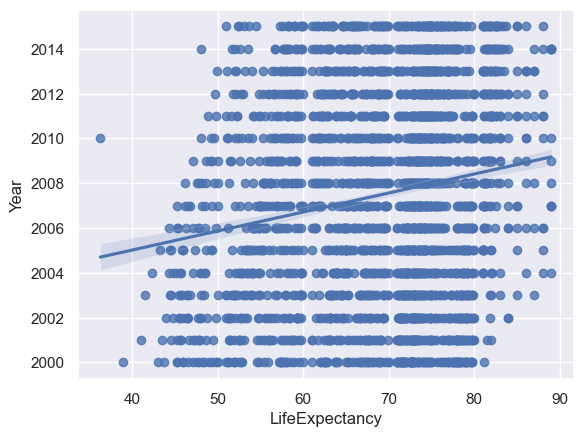

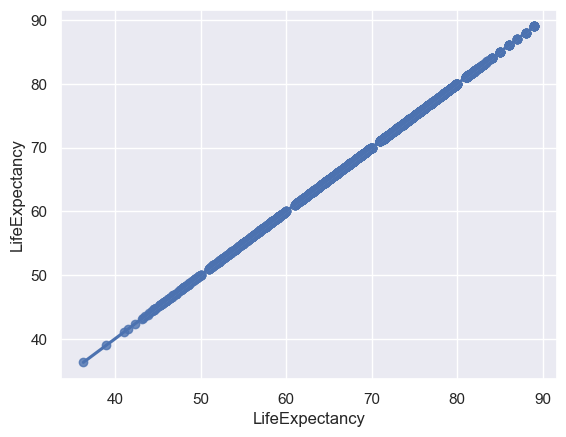

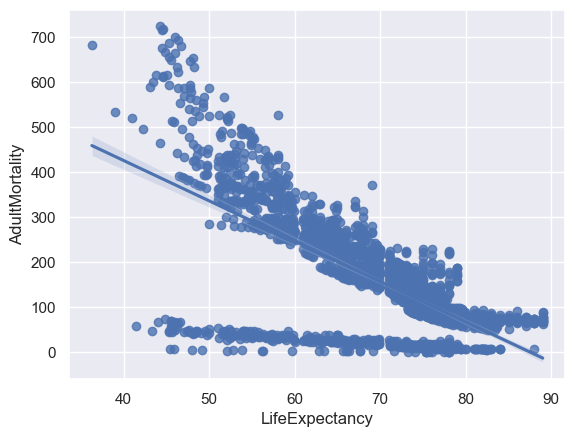

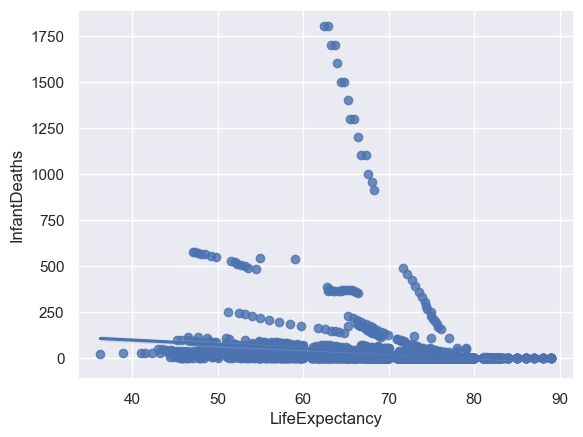

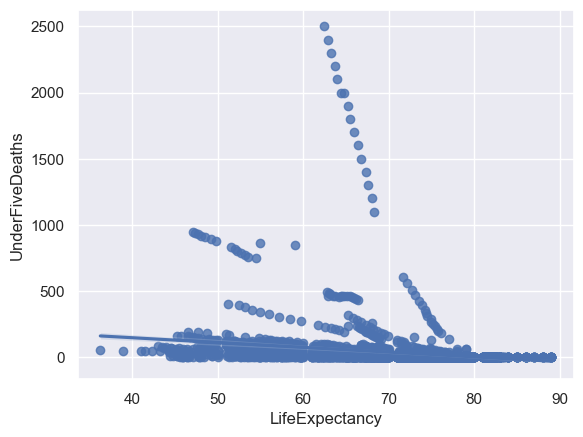

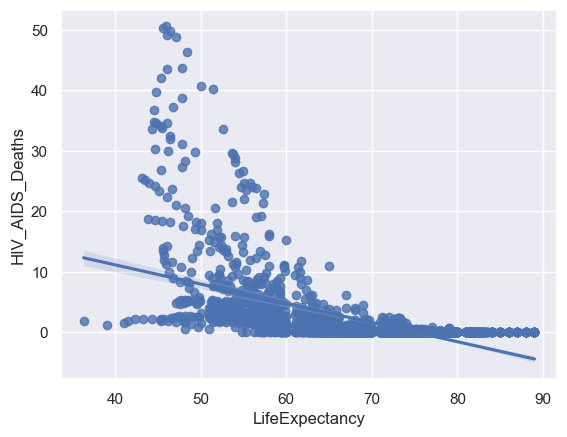

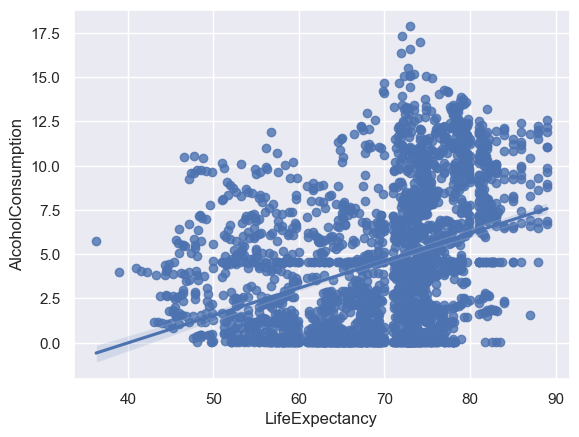

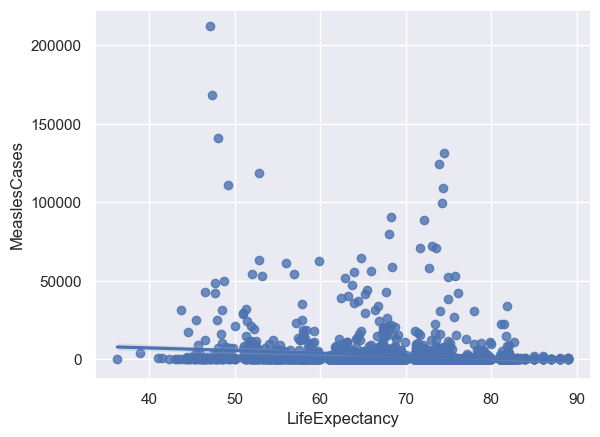

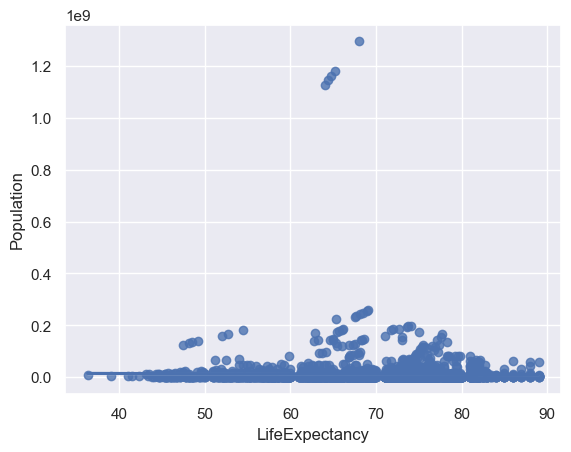

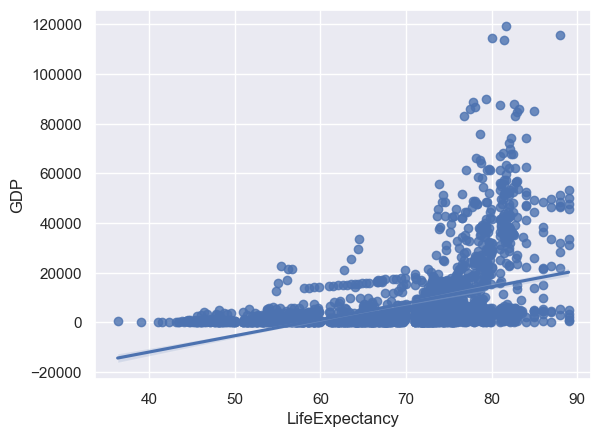

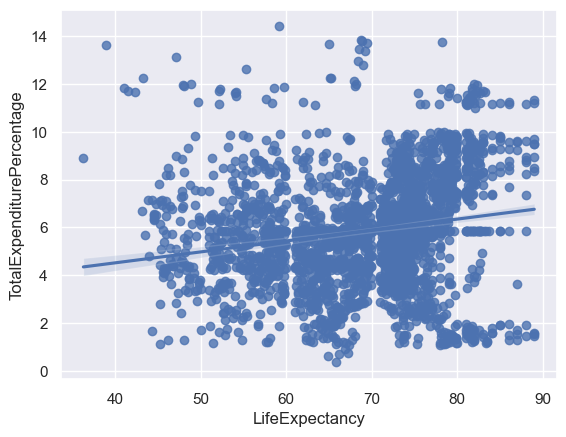

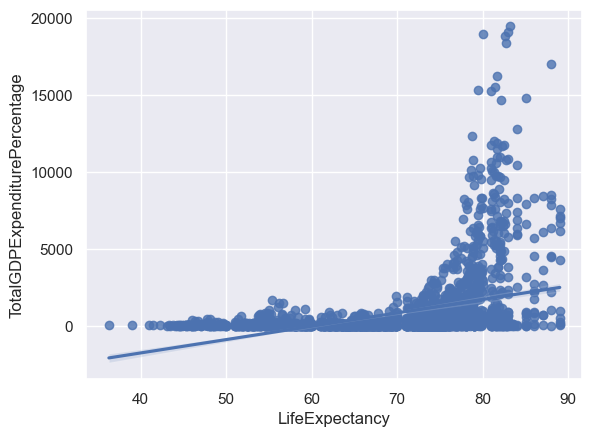

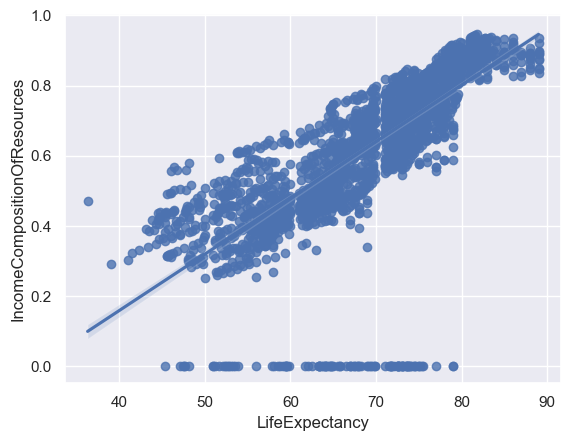

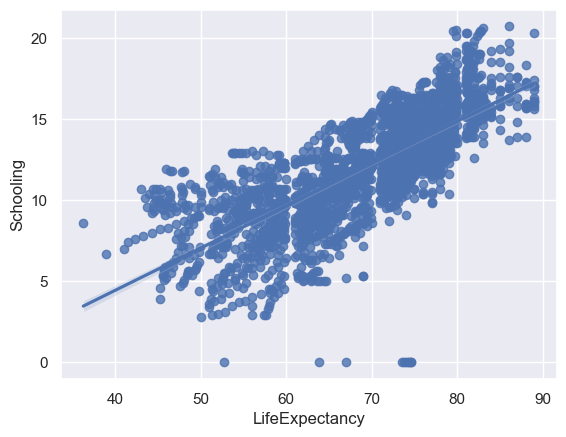

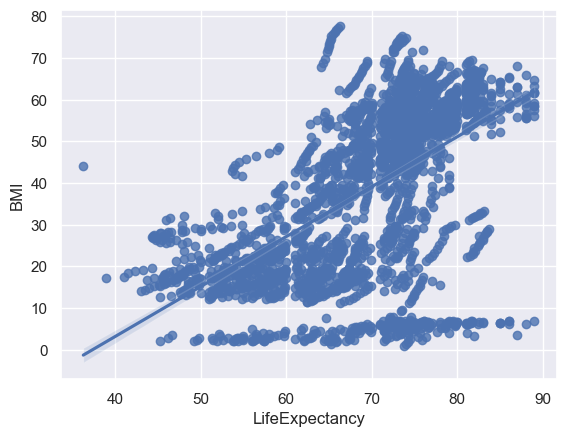

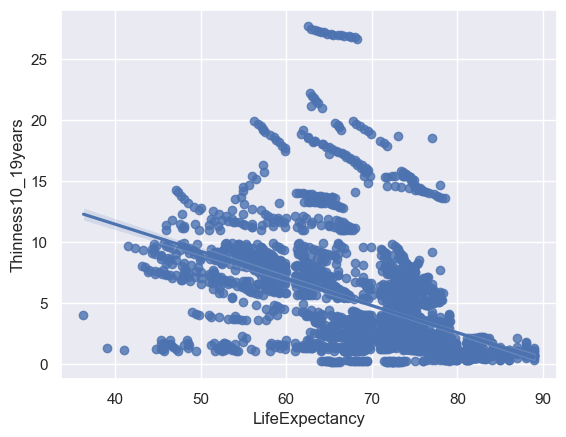

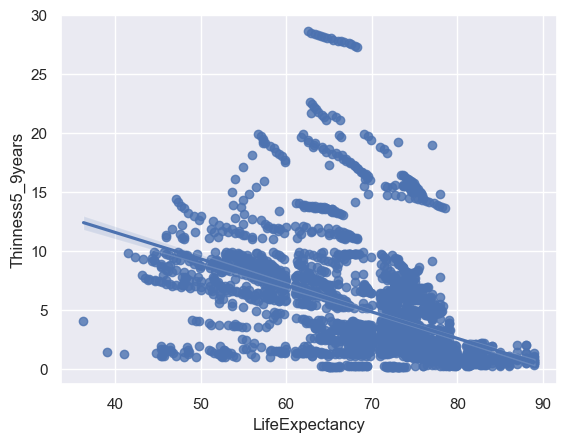

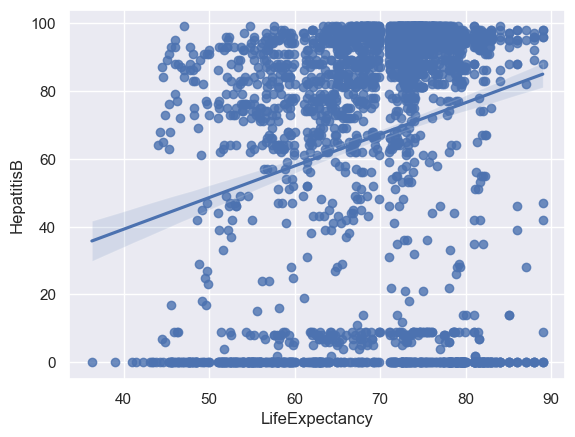

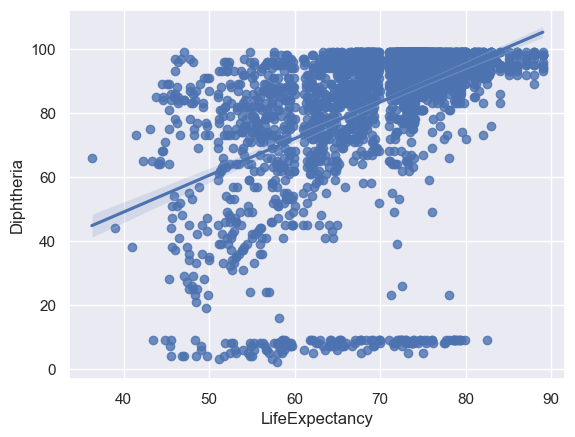

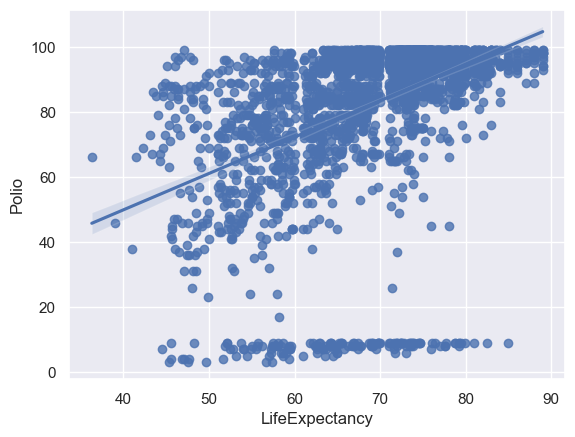

In [13]:
data_numeric_columns = data_mv_removed._get_numeric_data() 
numeric_columns = data_numeric_columns.columns

for i in numeric_columns:
    plt.figure()
    sns.regplot(x=data_numeric_columns['LifeExpectancy'],y=data_numeric_columns[i])
    plt.show()

*Observations:*

1. Life expectancy has increase over the years
2. As adult mortality increases, life expectancy decreases
3. Infant deaths, under five deaths & HIV deaths all decrease LE. HIV seems to be more linear.
4. <b>Alcohol consumption increases LE. Sort of counterintuitive, but lets explore it further with region.</b>
5. Measles cases dont seem to have an quantifiable effect. Explore further.
6. Population can be dropped as absolute number makes no effect on life expectancy.
7. LE is not really dependent on total healthcare expenditure as percentage of total governement expenditure as it is equally spread
8. But it is significantly increasing as expenditure per GDP is increasing
9. Income Composition Of Resources index and schooling also linearly effects LE
10. Higher the average BMI higher LE. This is a bit counter intuitive as very high BMI causes life threatening diseases.
11. Any one thinness variable can be used as both have similar effect and could be corelated to each other.
12. All vaccination variables increase LE as they increase

<b>So final list of continuous features to be used are:<br></b>
1. Year
2. Adult Mortality Rate
3. Infanct deaths
4. Under 5 deaths
5. HIV Deaths
6. Alcohol Consumption
7. Expernditure per GDP
8. Income Compostion
9. Schooling
10. BMI
11. Thinness10-19
12. HepB
13. Diphtheria
14. Polio

    

#### Exploring Categorical Variables

<AxesSubplot:xlabel='Status', ylabel='LifeExpectancy'>

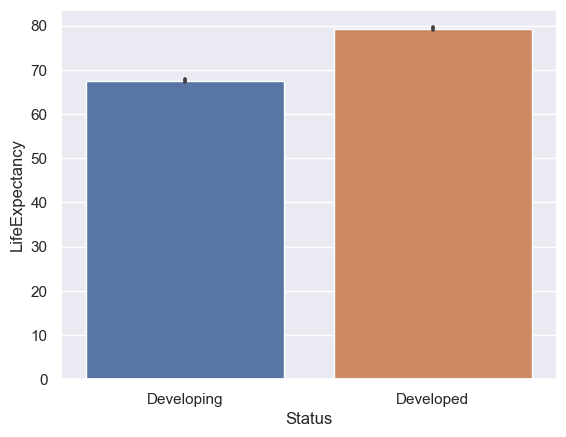

In [14]:
sns.barplot(x = data_mv_removed['Status'],y=data_mv_removed['LifeExpectancy'])

<AxesSubplot:xlabel='Country', ylabel='LifeExpectancy'>

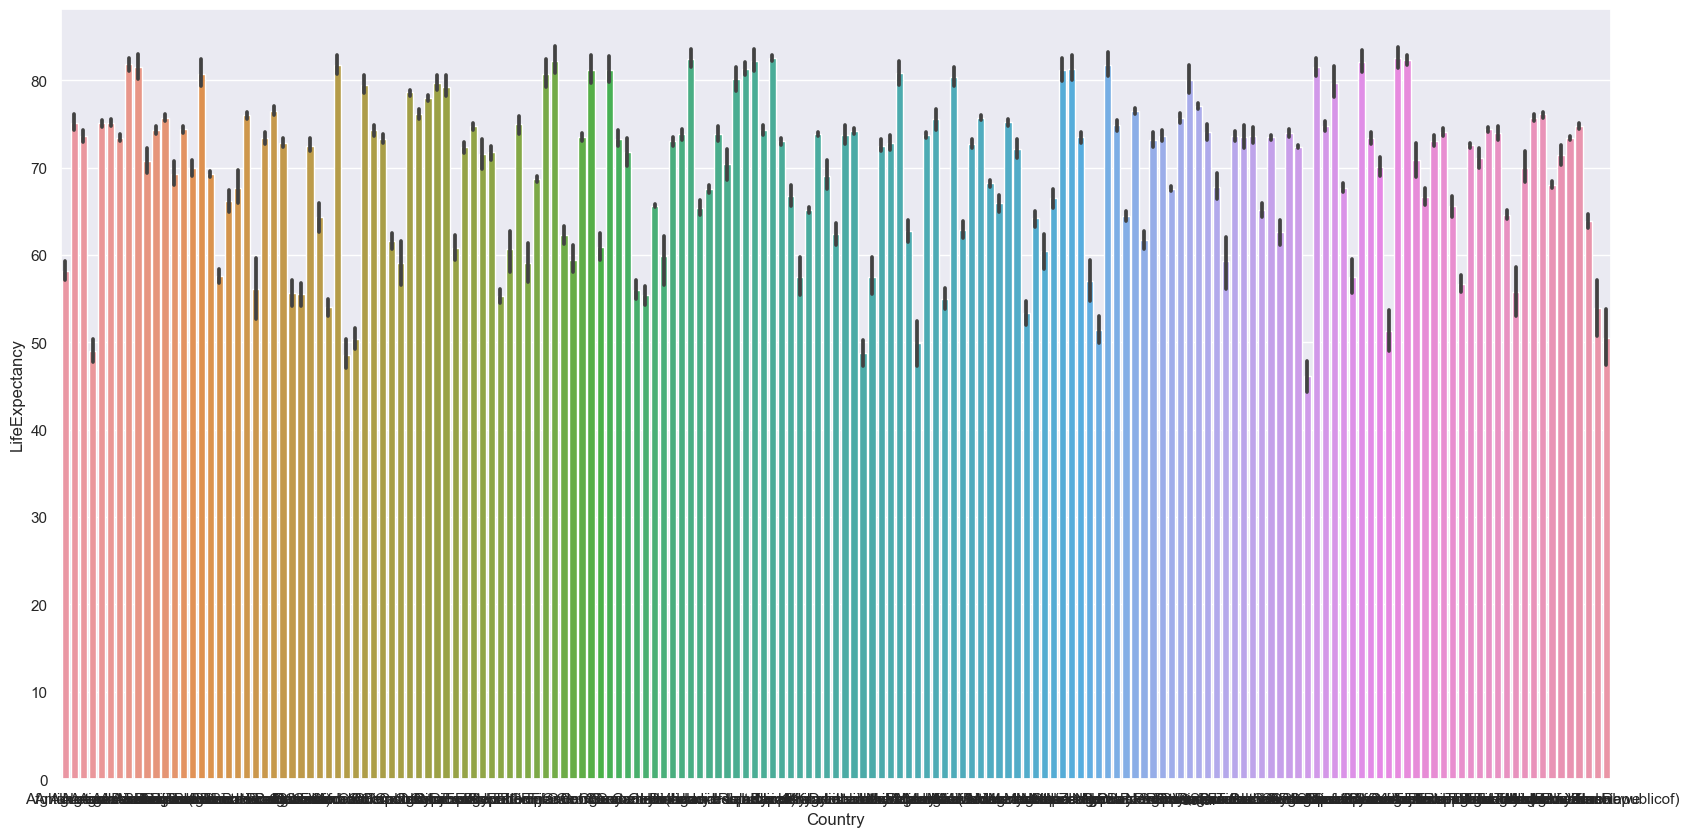

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x = data_mv_removed['Country'],y=data_mv_removed['LifeExpectancy'])

Bar plot with country makes no sense as there are too many of them, hence using mapping file

In [16]:
country_mapping = pd.read_csv('Dataset - Life Expectancy/Country_mapping.csv')
country_mapping.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [17]:
#Merging datasets and taking region and sub-region
data_merged = pd.merge(data_mv_removed, country_mapping[['name', 'region', 'sub-region']],
                                     left_on='Country', right_on='name')

<AxesSubplot:xlabel='Year', ylabel='LifeExpectancy'>

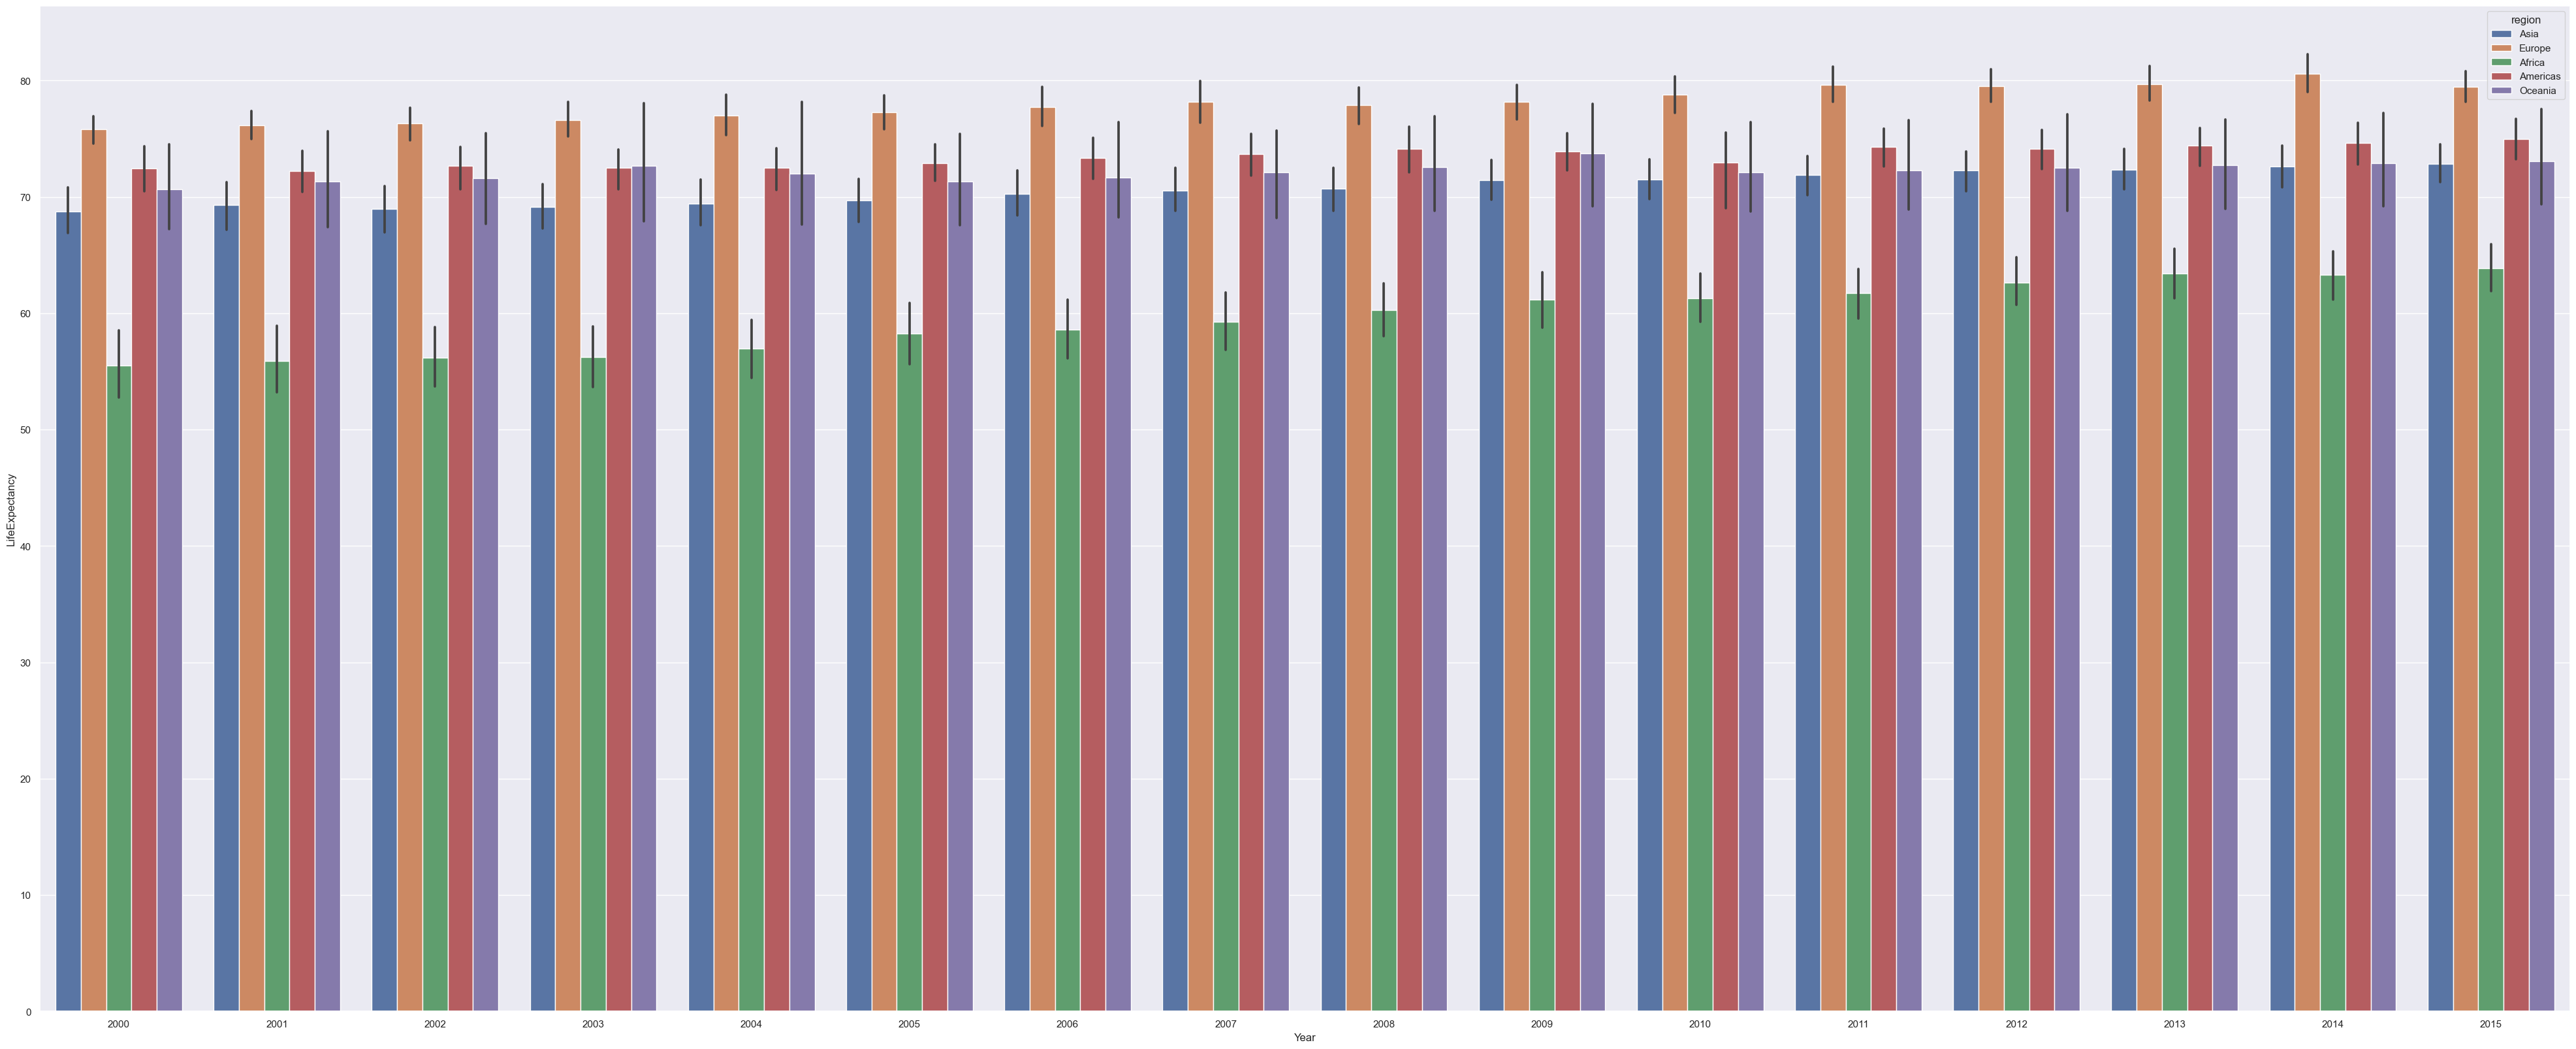

In [18]:
plt.figure(figsize=(50,20))
sns.barplot(x = data_merged['Year'],y=data_merged['LifeExpectancy'], hue=data_merged['region'])


#### Exploring Alcohol Consumption further

<AxesSubplot:xlabel='AlcoholConsumption', ylabel='LifeExpectancy'>

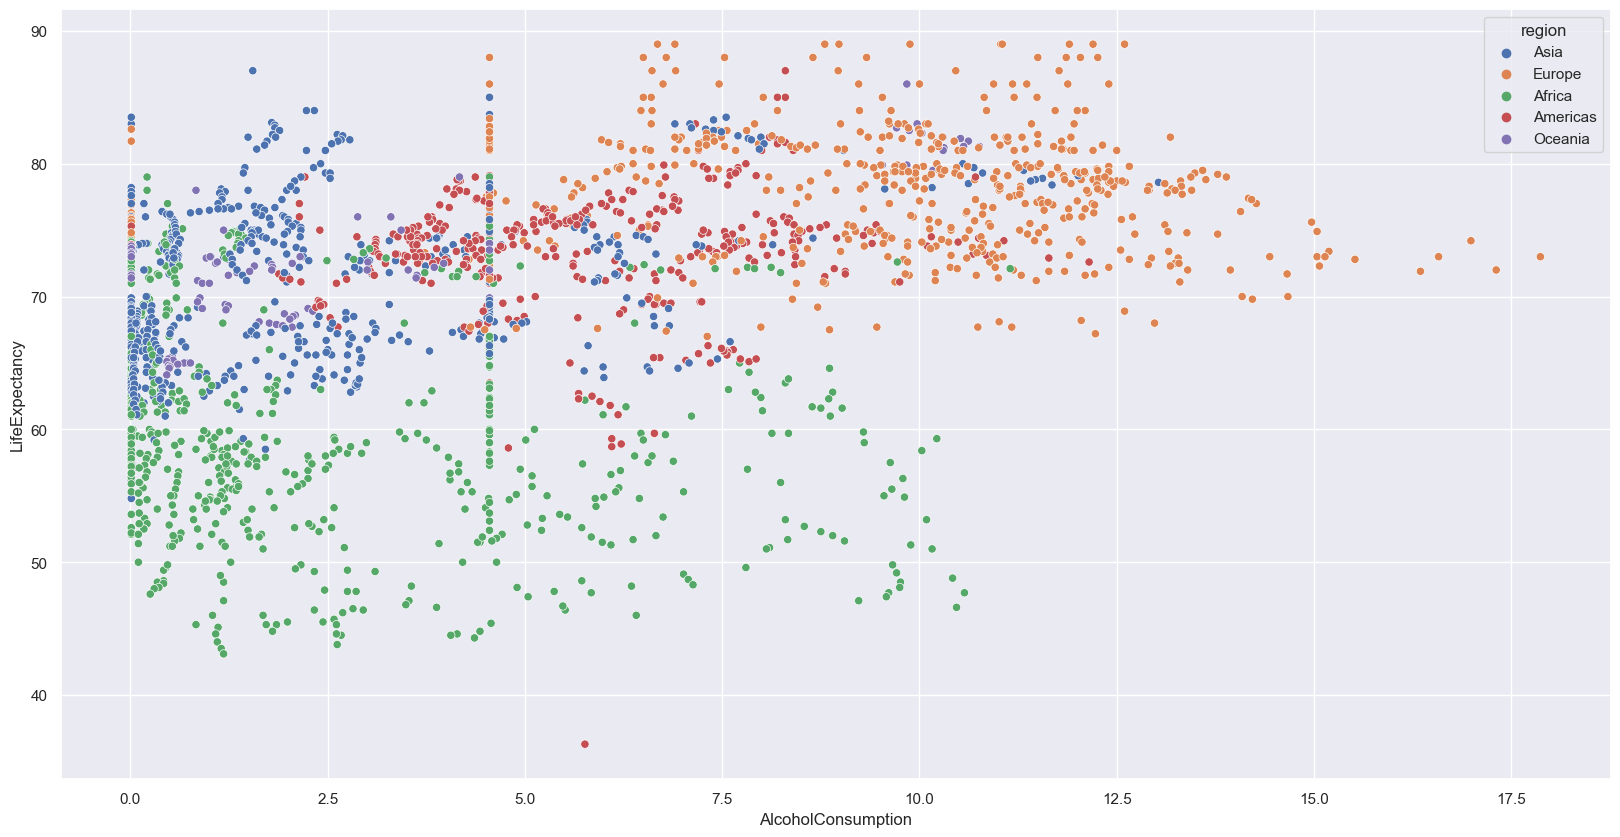

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data_merged['AlcoholConsumption'],y=data_merged['LifeExpectancy'], hue=data_merged['region'])

Observations:
1. Both status and region/country are important factors effecting Life Expectancy and hence should be used in regression
2. Alcohol consumption behaves differently accross regions. But as linear relationship is observed, we will go ahead with this feature.

#### Creating final dataset of selected features and target (Seeing correlation matrix too)

<AxesSubplot:>

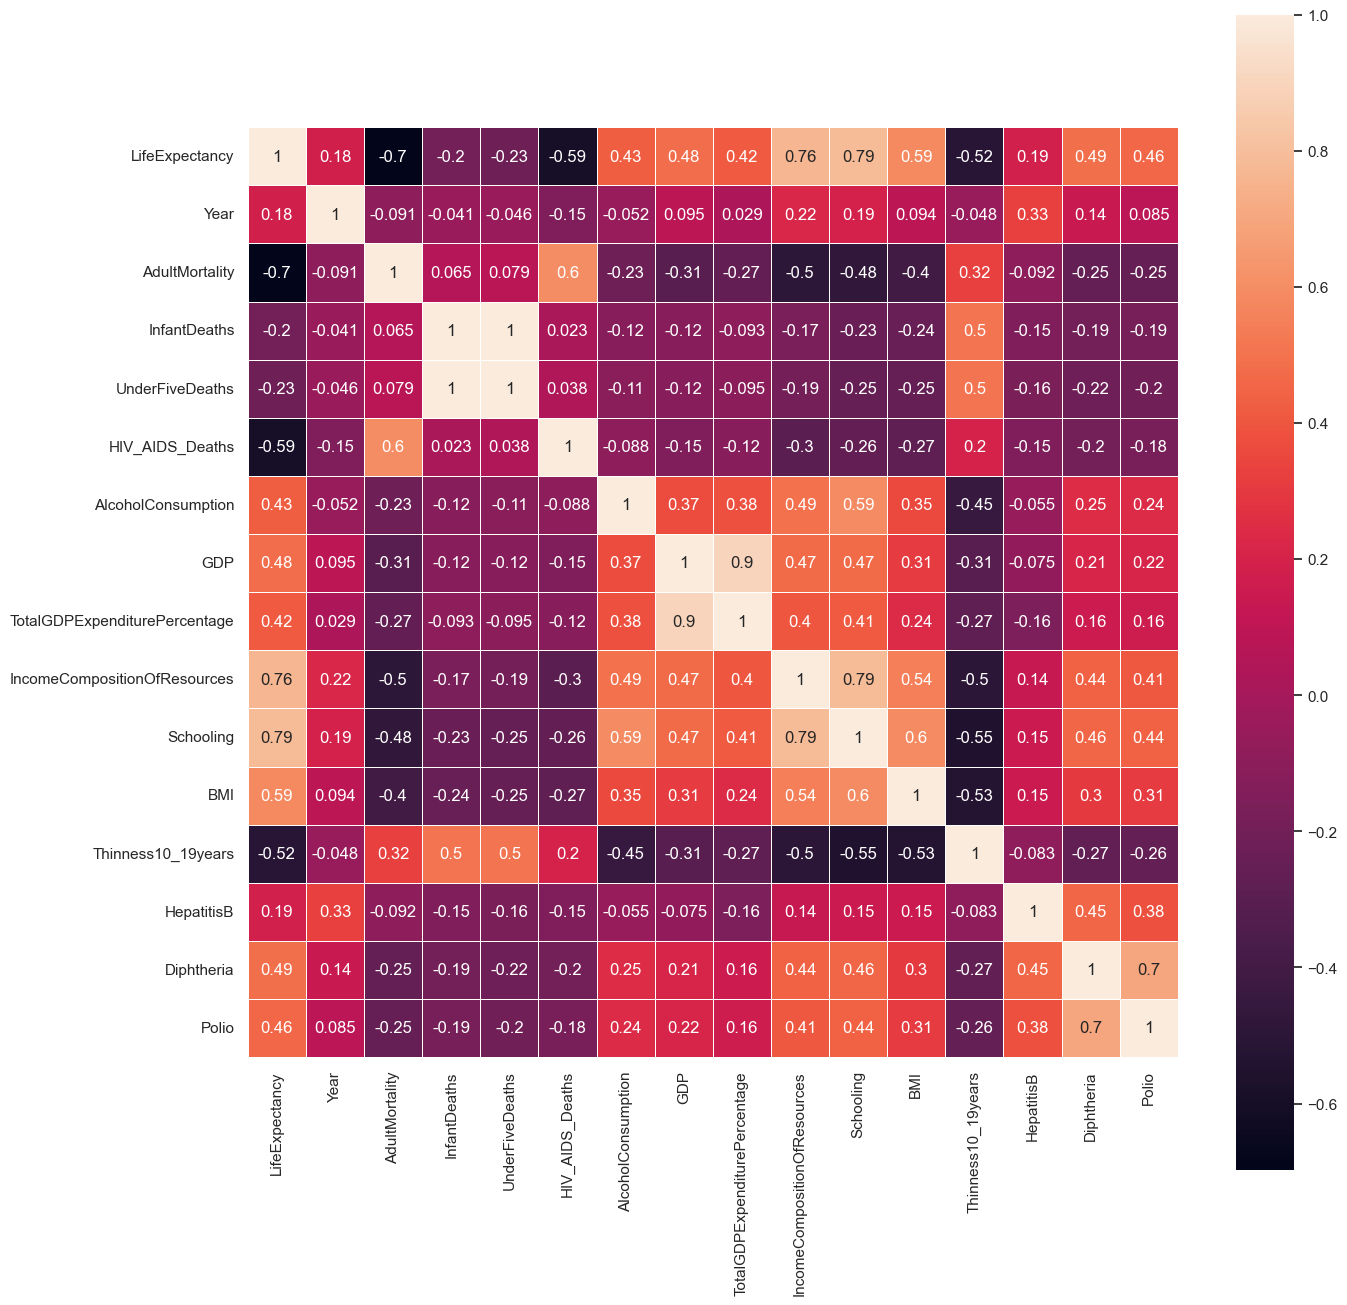

In [20]:
data_merged.columns.values

data_selected = data_merged[['LifeExpectancy', 'Country', 'Year', 'Status', 'AdultMortality', 'InfantDeaths',
                            'UnderFiveDeaths', 'HIV_AIDS_Deaths', 'AlcoholConsumption',
                            'GDP', 'TotalGDPExpenditurePercentage', 'IncomeCompositionOfResources', 'Schooling',
                           'BMI', 'Thinness10_19years', 'HepatitisB', 'Diphtheria', 'Polio']]

data_numeric_columns = data_selected._get_numeric_data() 

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_numeric_columns.corr(), annot=True, square=True, linewidths=.5)

<b>Creating dummy variables for categorical data</b>

In [21]:
data_with_dummies = pd.get_dummies(data_selected, drop_first=True)

In [22]:
data_with_dummies.head()

,LifeExpectancy,Year,AdultMortality,InfantDeaths,UnderFiveDeaths,HIV_AIDS_Deaths,AlcoholConsumption,GDP,TotalGDPExpenditurePercentage,IncomeCompositionOfResources,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,65.0,2015,263.0,62,83,0.1,0.01,584.259210,71.279624,0.479,...,0,0,0,0,0,0,0,0,0,1
1,59.9,2014,271.0,64,86,0.1,0.01,612.696514,73.523582,0.476,...,0,0,0,0,0,0,0,0,0,1
2,59.9,2013,268.0,66,89,0.1,0.01,631.744976,73.219243,0.470,...,0,0,0,0,0,0,0,0,0,1
3,59.5,2012,272.0,69,93,0.1,0.01,669.959000,78.184215,0.463,...,0,0,0,0,0,0,0,0,0,1
4,59.2,2011,275.0,71,97,0.1,0.01,63.537231,7.097109,0.454,...,0,0,0,0,0,0,0,0,0,1


#### Checking OLS Assumptions

1. Linearity - We already so the features we have selected are linearly related to the target
2. No endogenity - We will check this if any counter intuitive results obtained
3. Normality and homoscedasticity
4. No autocorrelation - Wont be there as we are not dealing with time series data
5. Mutlicolinearity - Lets check this below

In [23]:
data_to_check = data_numeric_columns.drop(['LifeExpectancy', 'UnderFiveDeaths'], axis = 1)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

var = data_to_check
vif = pd.DataFrame()
vif['Features'] = var.columns
vif['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]

vif

,Features,VIF
0,Year,53.532727
1,AdultMortality,5.424345
2,InfantDeaths,1.515269
3,HIV_AIDS_Deaths,1.804559
4,AlcoholConsumption,4.034386
5,GDP,7.169934
6,TotalGDPExpenditurePercentage,6.233371
7,IncomeCompositionOfResources,32.265939
8,Schooling,57.839648
9,BMI,8.443145


Note: There are some features like Year, IncomeCompostition, Schooling, Diphtheria and Polio with high VIF can cause multicolenearity proble, But we have to proceed with them as they are highly effecting the target

### Building the model

In [25]:
# Target
y = data_with_dummies['LifeExpectancy']

# Features 
x = data_with_dummies.drop(['LifeExpectancy'], axis = 1)

Scaling the features for better interpretation

In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x)

x_scaled = scalar.transform(x)

Splitting train and test

In [27]:
from sklearn.model_selection import train_test_split 


x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.15, random_state = 365)

print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape,)

(1870, 153) (330, 153) (1870,) (330,)


In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [29]:
reg.score(x_train, y_train)

0.9621592347578376

###### Examining the model results

In [30]:
# Bias
reg.intercept_

69.83516236697926

In [37]:
# Weights
pd.options.display.float_format = '{:.5f}'.format

reg_summary = pd.DataFrame(x.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_.round(5)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(reg_summary.sort_values(by = ['Weights']))

                          Features              Weights
152              Status_Developing -3900715834792.68359
91               Country_Lithuania  -823046862605.22229
34                Country_Bulgaria  -823046862605.15198
86                  Country_Latvia  -823046862605.09851
123                Country_Romania  -823046862605.05115
70                 Country_Hungary  -823046862605.02673
130               Country_Slovakia  -823046862605.00403
120                 Country_Poland  -823046862604.97388
45                 Country_Croatia  -823046862604.87231
48                 Country_Denmark  -823046862604.70190
75                 Country_Ireland  -823046862604.65515
121               Country_Portugal  -823046862604.63220
20               Country_Australia  -823046862604.61438
131               Country_Slovenia  -823046862604.58533
47                  Country_Cyprus  -823046862604.57483
28                 Country_Belgium  -823046862604.56067
61                 Country_Germany  -82304686260

In [38]:
y_pred = reg.predict(x_train)

<b>Predictions vs Actual Graph</b>

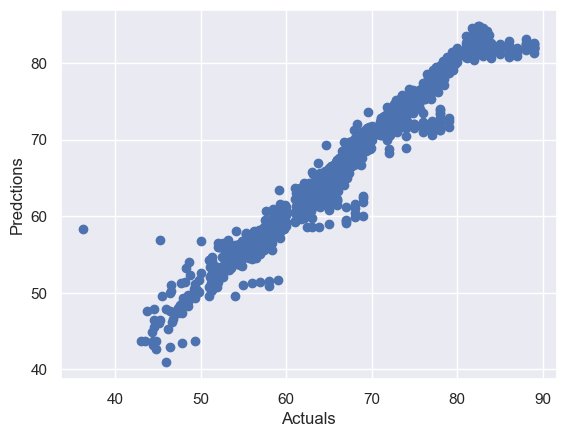

In [39]:
plt.scatter(y_train, y_pred)
plt.xlabel('Actuals')
plt.ylabel('Predctions')
plt.show()

<b>Residual PDF</b>

Text(0.5, 1.0, 'Residuals PDF')

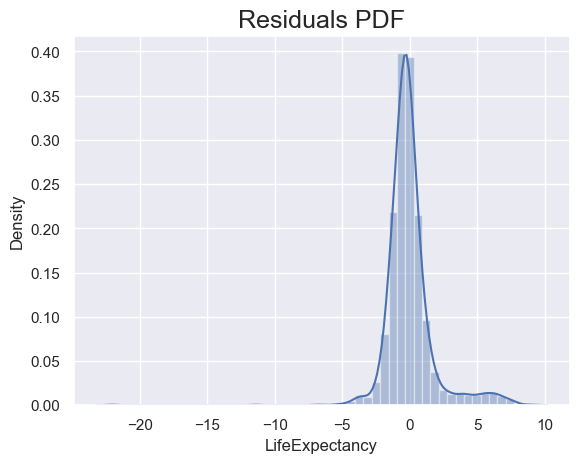

In [41]:
sns.distplot(y_train - y_pred)
plt.title("Residuals PDF", size=18)

Predictions are pretty close to actuals using training dataset. Now lets test it.
The long left tail suggests some outliers.

#### Testing

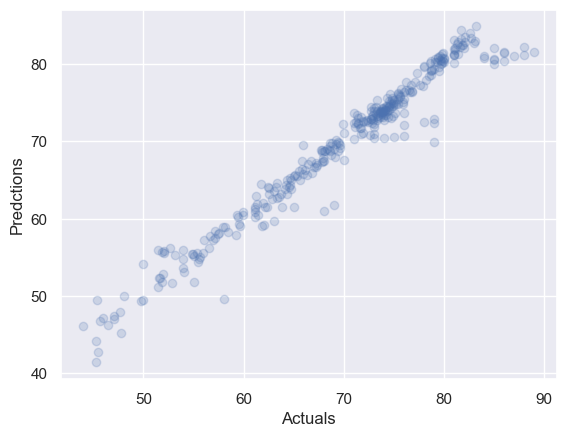

In [43]:
y_pred_test = reg.predict(x_test)
plt.scatter(y_test, y_pred_test, alpha = 0.2)
plt.xlabel('Actuals')
plt.ylabel('Predctions')
plt.show()

Prediction is better for LifeExpectancy in range of 65-80